# Importing Libraries

We start by importing the libraries we are going to use for this project

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.stats import entropy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ticker = input( "Nasdaq : ")
data = yf.download(ticker, start="2022-10-01", end="2023-9-30")

Nasdaq : ^IXIC
[*********************100%%**********************]  1 of 1 completed


# **Exploratory Data Analysis**

We're going to get some general info on the data that we're working with before starting with our analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-10-03 to 2023-09-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [4]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,12197.429129,12293.978633,12105.224898,12204.709586,12204.709586,4.913955e+09
std,1215.988341,1201.378911,1226.365833,1211.750501,1211.750501,7.560239e+08
min,10131.820312,10393.219727,10088.830078,10213.290039,10213.290039,2.184080e+09
25%,11146.790283,11245.925049,11029.549805,11171.769775,11171.769775,4.431810e+09
50%,11986.234863,12089.009766,11920.370117,12010.209961,12010.209961,4.819810e+09
75%,13500.539551,13590.500244,13425.257080,13488.047119,13488.047119,5.249710e+09
max,14398.530273,14446.549805,14317.089844,14358.019531,14358.019531,8.162210e+09


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-03,10659.009766,10875.459961,10577.889648,10815.429688,10815.429688,4415440000
2022-10-04,11054.719727,11189.959961,11044.040039,11176.410156,11176.410156,5004780000
2022-10-05,11022.669922,11210.320312,10910.759766,11148.639648,11148.639648,4091860000
2022-10-06,11129.040039,11230.440430,11051.269531,11073.309570,11073.309570,4423320000
2022-10-07,10877.280273,10891.929688,10608.519531,10652.400391,10652.400391,4634190000


In [6]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-25,13172.540039,13277.830078,13132.000000,13271.320312,13271.320312,4100290000
2023-09-26,13180.959961,13199.129883,13033.400391,13063.610352,13063.610352,4693540000
2023-09-27,13115.360352,13156.370117,12963.160156,13092.849609,13092.849609,4841410000
2023-09-28,13043.370117,13270.969727,13025.110352,13201.280273,13201.280273,4648390000
2023-09-29,13337.709961,13382.980469,13177.089844,13219.320312,13219.320312,5138500000


# **Plotting time series of adjusted closing prices**

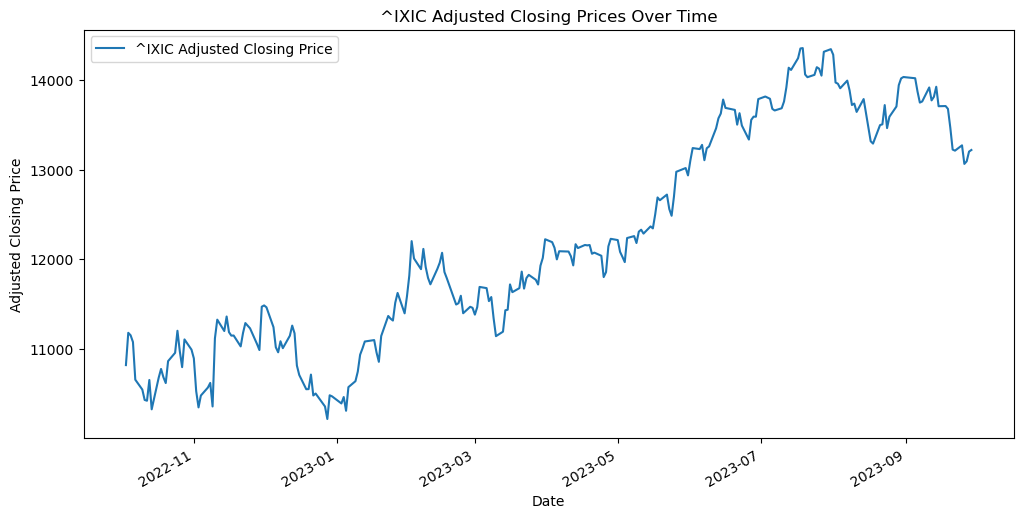

In [7]:
plt.figure(figsize=(12, 6))
data['Adj Close'].plot(label=f'{ticker} Adjusted Closing Price', title=f'{ticker} Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()

# **Plotting the Candlestick chart**

In [8]:
import mplfinance as mpf

In [9]:
stock_data = yf.download(ticker, start="2023-01-01", end="2023-10-16")

[*********************100%%**********************]  1 of 1 completed


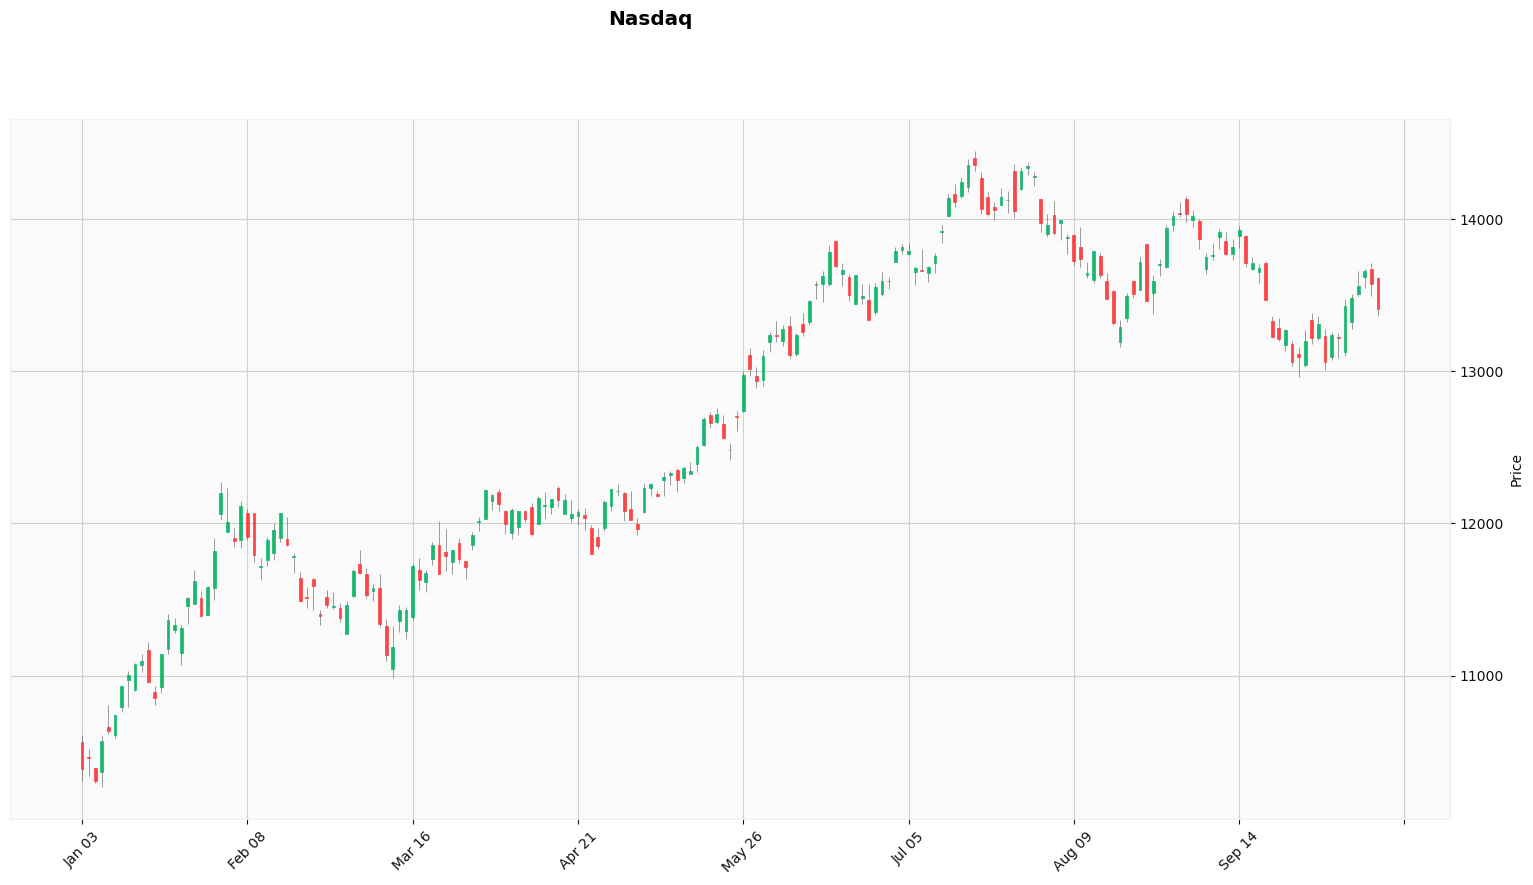

In [10]:
figsize = (20, 10)
mpf.plot (stock_data, type='candle', style='yahoo', title=f'Nasdaq', figsize=figsize)

# **Calculating our OPD, H and C**

Using our Nasdaq data from yfinance, we are going to define and determine our ordinal pattern (OPD), statistical complexity (C) and our shannon entropy (H)

In [11]:
def ordinal_pattern_distribution(Adj_Close, window_size):
    opd = {}  # Dictionary to store the counts of ordinal patterns
    
    for i in range(len(Adj_Close) - window_size + 1):
        window = Adj_Close[i:i+window_size]
        ordinal_pattern = tuple(np.argsort(window))
        
        if ordinal_pattern in opd:
            opd[ordinal_pattern] += 1
        else:
            opd[ordinal_pattern] = 1
    
    total_count = sum(opd.values())
    opd_prob = {pattern: count / total_count for pattern, count in opd.items()}
    
    return opd_prob

# Defining our timeseries
Adj_Close = data['Adj Close']

# Window size (d) - choose an appropriate window size
window_size = 3

# Calculate the ordinal pattern distribution
opd = ordinal_pattern_distribution(Adj_Close, window_size)

# Print the ordinal pattern distribution
for pattern, probability in opd.items():
    print(f"Pattern {pattern}: Probability {probability:.4f}")


Pattern (0, 2, 1): Probability 0.1210
Pattern (2, 1, 0): Probability 0.2460
Pattern (1, 0, 2): Probability 0.1452
Pattern (2, 0, 1): Probability 0.1290
Pattern (0, 1, 2): Probability 0.2540
Pattern (1, 2, 0): Probability 0.1048


In [12]:
# Create a DataFrame with the time series data
df = pd.DataFrame({'Adj Close': Adj_Close})


# Define a list of time delays (tau) to visualize
time_delays = [1, 2, 3, 4]

# Define Shannon entropy calculation function
def shannon_entropy(opd_prob):
    entropy = -sum(prob * np.log2(prob) for prob in opd_prob.values())
    return entropy

# Define statistical complexity calculation function
def statistical_complexity(opd_prob, shannon_entropy):
    complexity = -shannon_entropy / np.log2(len(opd_prob))
    return complexity

In [13]:
prices = stock_data['Adj Close'].values

embedding_dimension = 3
m = embedding_dimension
tau = 2
X = np.array([prices[i:i+m] for i in range(0, len(prices) - (m - 1) * tau, tau)])
print(X)

[[10386.98046875 10458.75976562 10305.24023438]
 [10305.24023438 10569.29003906 10635.65039062]
 [10635.65039062 10742.62988281 10931.66992188]
 [10931.66992188 11001.09960938 11079.16015625]
 [11079.16015625 11095.11035156 10957.00976562]
 [10957.00976562 10852.26953125 11140.4296875 ]
 [11140.4296875  11364.41015625 11334.26953125]
 [11334.26953125 11313.36035156 11512.41015625]
 [11512.41015625 11621.70996094 11393.80957031]
 [11393.80957031 11584.54980469 11816.3203125 ]
 [11816.3203125  12200.8203125  12006.95019531]
 [12006.95019531 11887.45019531 12113.79003906]
 [12113.79003906 11910.51953125 11789.58007812]
 [11789.58007812 11718.12011719 11891.79003906]
 [11891.79003906 11960.15039062 12070.58984375]
 [12070.58984375 11855.83007812 11787.26953125]
 [11787.26953125 11492.29980469 11507.0703125 ]
 [11507.0703125  11590.40039062 11394.94042969]
 [11394.94042969 11466.98046875 11455.54003906]
 [11455.54003906 11379.48046875 11462.98046875]
 [11462.98046875 11689.00976562 11675.74

In [14]:
H = 2.488845922229854 / np.log2(6)
print(H)

0.9628170317888606


In [15]:
prices = stock_data['Adj Close'].values

# Define a range of time delays to calculate Shannon entropy for
min_tau = 1  
max_tau = 12  
# tau = 2
embedding_dimension = 3  

# Initialize an empty list to store Shannon entropy values
H_vec = []

# Create an array of vectors using time-delay embedding for each tau
for tau in range(min_tau, max_tau + 1):
    m = embedding_dimension

    # Create the time-delay embedding vectors
    X = np.array([prices[i:i+m] for i in range(0, len(prices) - (m - 1) * tau, 1)])

    # Sort each row in the embedding vectors to obtain ordinal patterns
    X_sorted = np.argsort(X, axis=1)

    # Count the frequency of each ordinal pattern
    pattern_counts = pd.value_counts([tuple(pattern) for pattern in X_sorted])

    # Calculate the probability distribution
    pattern_probabilities = pattern_counts / len(X_sorted)

    # Calculate Shannon entropy for the current tau
    shannon_entropy = entropy(pattern_probabilities, base=2)/np.log2(6)
    
    # Append the Shannon entropy to the H_vec list
    H_vec.append(shannon_entropy)

# Print or analyze the H_vec to observe how Shannon entropy changes with different time delays
print("Shannon Entropy Vector (H_vec):", H_vec)
# print(pattern_probabilities)


Shannon Entropy Vector (H_vec): [0.9616223656600588, 0.960827113135722, 0.9636870868545273, 0.9642663202143007, 0.9616354932366608, 0.9622775821738194, 0.9650859534292764, 0.9628329437600484, 0.9626436985292736, 0.9637821079147978, 0.9613583260660474, 0.9618820343974896]


In [16]:
H_mean = np.mean(H_vec)
print(H_mean)

0.9626584187810018


In [17]:
H_theoretical = 0.96713

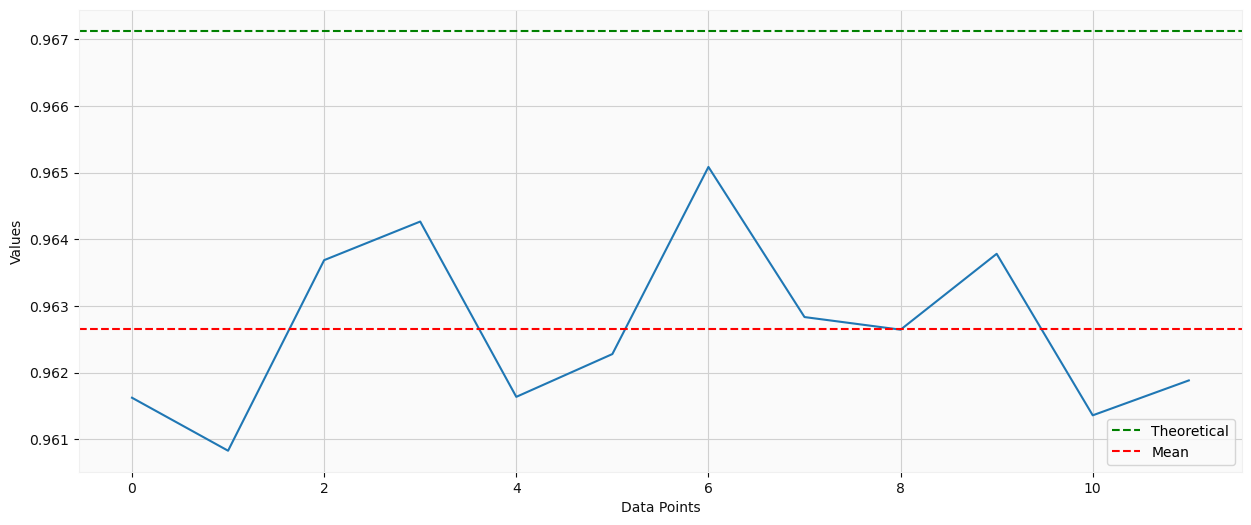

In [18]:
plt.figure(figsize=(15, 6))
plt.plot(H_vec)
plt.axhline(y=H_theoretical, color='g', linestyle='--', label='Theoretical') # Plotting the mean as a straight line
plt.axhline(y=H_mean, color='r', linestyle='--', label='Mean') # Plotting the mean as a straight line
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

In [19]:

prices = stock_data['Adj Close'].values

# Define a range of time delays to calculate Shannon entropy for
min_tau = 1 
max_tau = 10  
embedding_dimension = 3  

# Initialize variables to store H_max and H_min
H_max = -np.inf
H_min = np.inf

# Create an array of vectors using time-delay embedding for each tau
for tau in range(min_tau, max_tau + 1):
    m = embedding_dimension

    # Create the time-delay embedding vectors
    X = np.array([prices[i:i+m] for i in range(0, len(prices) - (m - 1) * tau, 1)])

    # Sort each row in the embedding vectors to obtain ordinal patterns
    X_sorted = np.argsort(X, axis=1)

    # Count the frequency of each ordinal pattern
    pattern_counts = pd.value_counts([tuple(pattern) for pattern in X_sorted])

    # Calculate the probability distribution
    pattern_probabilities = pattern_counts / len(X_sorted)

    # Calculate Shannon entropy for the current tau
    shannon_entropy = entropy(pattern_probabilities, base=2) / np.log2(6)

    # Update H_max and H_min if needed
    H_max = max(H_max, shannon_entropy)
    H_min = min(H_min, shannon_entropy)

# Print or use H_max and H_min as needed
print("Maximum Shannon Entropy (H_max):", H_max)
print("Minimum Shannon Entropy (H_min):", H_min)
print("The pattern probabilities is:\n", pattern_probabilities)
print( "The Shannon Entropy vector (H_vec):",H_vec)

Maximum Shannon Entropy (H_max): 0.9650859534292764
Minimum Shannon Entropy (H_min): 0.960827113135722
The pattern probabilities is:
 (0, 1, 2)    0.288136
(2, 1, 0)    0.209040
(2, 0, 1)    0.135593
(1, 0, 2)    0.135593
(0, 2, 1)    0.118644
(1, 2, 0)    0.112994
Name: count, dtype: float64
The Shannon Entropy vector (H_vec): [0.9616223656600588, 0.960827113135722, 0.9636870868545273, 0.9642663202143007, 0.9616354932366608, 0.9622775821738194, 0.9650859534292764, 0.9628329437600484, 0.9626436985292736, 0.9637821079147978, 0.9613583260660474, 0.9618820343974896]


# Calculating the linear growth and exponential growth

**Linear growth**

Simple Growth Formula: A = P * (1 + r * t)
Where:
- A = Final amount
- P = Principal amount (initial amount)
- r = Rate of growth (as a decimal)
- t = Time (in years)

In [20]:
def simple_growth_rate(prices):
    return ((prices.iloc[-1] - prices.iloc[0]) / prices.iloc[0]) * 100

In [21]:
simple_growth = simple_growth_rate(Adj_Close)

In [22]:
print("Simple Growth Rate for", ticker, ":", simple_growth, "%")

Simple Growth Rate for ^IXIC : 22.2264920993228 %


**Exponential growth**

In [23]:
def exponential_growth_rate(prices):
    return ((prices.iloc[-1] / prices.iloc[0]) ** (1 / len(prices)) - 1) * 100

In [24]:
exponential_growth = exponential_growth_rate(Adj_Close)

In [25]:
print("Exponential Growth Rate for", ticker, ":", exponential_growth, "%")

Exponential Growth Rate for ^IXIC : 0.080314486909705 %


Based on our calculations, the simple growth rate is higher than the exponential growth rate for Nasdaq

# Correlation analysis

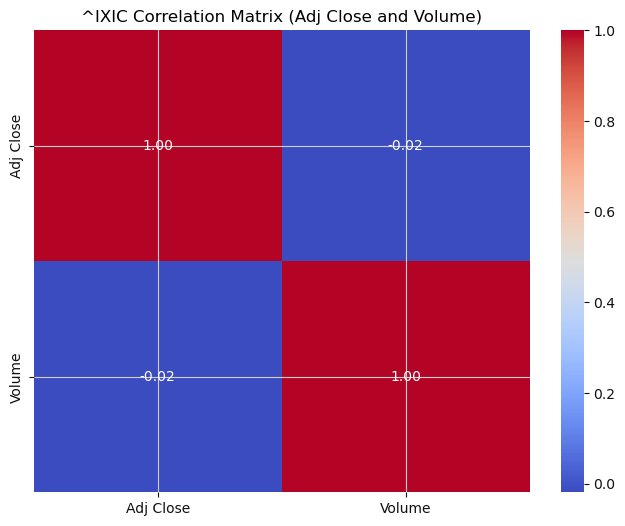

In [26]:
correlation_matrix = data[['Adj Close', 'Volume']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'{ticker} Correlation Matrix (Adj Close and Volume)')

plt.show()

Based on the heatmap, there is a small negative correlation between the Adjusted closing price and the volume of Nasdaq shares traded.